In [8]:
'''Regularize Decision Tree Classifier
How to efficiently plot Decision Boundaries
How to regulate Decision Tree Classifier from Overfitting  '''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [33]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

x, y = make_moons(n_samples=150, noise=0.2)
dtree_clf = DecisionTreeClassifier()
dtree_clf_msl6 = DecisionTreeClassifier(min_samples_leaf=6)
dtree_clf.fit(x,y)
dtree_clf_msl6.fit(x,y)

DecisionTreeClassifier(min_samples_leaf=6)

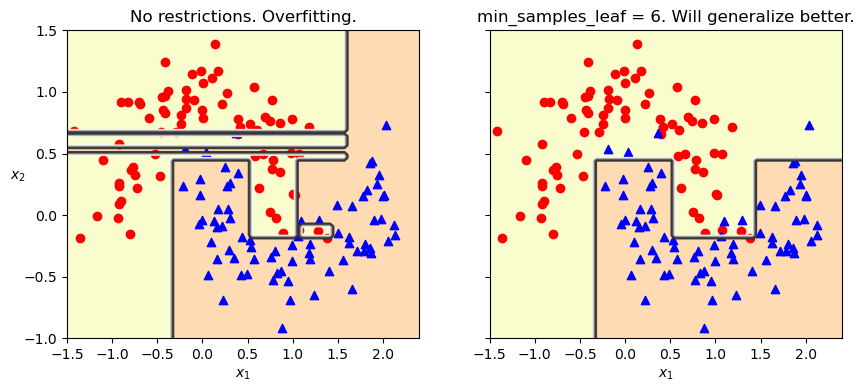

In [47]:
def decision_boundary_plot(clf,x,y,axes):
    x1,x2 = np.meshgrid(np.linspace(axes[0],axes[1],100),
                       np.linspace(axes[2],axes[3],100))
    x_topredict = np.c_[x1.ravel(),x2.ravel()]
    y_predicted = clf.predict(x_topredict).reshape(x1.shape)
    plt.contourf(x1,x2,y_predicted,alpha=0.3, cmap='Wistia')
    plt.contour(x1,x2,y_predicted,cmap="Greys", alpha=0.8)    
    for idx,markers,colors in (zip((0,1),("o", "^"),("red", "blue"))):
        plt.scatter(x[:,0][y==idx],x[:,1][y==idx],
                color=colors,marker=markers)
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
decision_boundary_plot(dtree_clf,x,y,
                       axes=[-1.5, 2.4, -1, 1.5])
plt.title("No restrictions. Overfitting.")

plt.sca(axes[1])
decision_boundary_plot(dtree_clf_msl6,x,y,
                      axes=[-1.5, 2.4, -1, 1.5])
plt.title(f"min_samples_leaf = {dtree_clf_msl6.min_samples_leaf}. Will generalize better.")
plt.ylabel("")
plt.show();

In [43]:
# Looks like 2nd tree generalizes better
# Evaluate both trees on a test set:
x_test,y_test = make_moons(n_samples=1000, noise=0.2)
dtree_clf.score(x_test,y_test),dtree_clf_msl6.score(x_test,y_test)

(0.919, 0.939)